<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/REDUCCION_DIMENSION_KERNEL_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az 

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 10541 (delta 25), reused 12 (delta 5), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 19.67 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [4]:
!pip install sklearn

# Kernel ACP

# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [6]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 9 - Dimensionality Reduction/Section 45 - Kernel PCA/Social_Network_Ads.csv')

X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [7]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Aplicar Kernel ACP

In [10]:
from sklearn.decomposition import KernelPCA

In [12]:
kpca = KernelPCA(n_components = 2, kernel = "rbf") # le metemos 2 componenetes y el kernel que utilizamos es rbf por defecto sería lineal. 
# aplicamos rbf que es el radial base function
X_train = kpca.fit_transform(X_train) # lo transformamos. 
X_test = kpca.transform(X_test) # se lo aplicamos a test. 

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicción de los resultados con el Conjunto de Testing

In [15]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[64,  4],
       [ 6, 26]])

In [20]:
(64+26)/(64+4+6+26) # 90 % de precisión

0.9

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


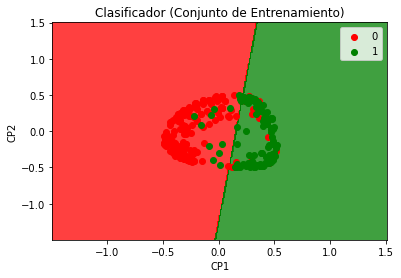

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


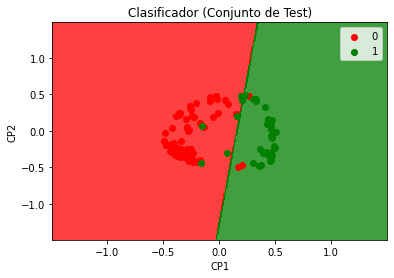

In [18]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()